<a href="https://colab.research.google.com/github/SimeonHristov99/CodeEveryDay/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import os
import zipfile
from glob import glob

from sklearn.model_selection import train_test_split

import tensorflow as tf
print(tf.__version__)

import numpy as np
import matplotlib.pyplot as plt

2.7.0


In [91]:
config = {
    'kaggle_dir': '../gdrive/MyDrive/kaggle',
    'data_path': '/content/data/train/train'
}

In [92]:
os.chdir('/content')
if not os.path.isdir('data'):
  kaggle_dir = config.get('kaggle_dir', None)

  from google.colab import drive
  drive.mount('/gdrive')
  
  assert kaggle_dir is not None and os.path.isdir(kaggle_dir), 'Kaggle directory not found!'
  assert os.path.isfile(f'{kaggle_dir}/kaggle.json'), 'Kaggle API token not found!'

  !pip install -q kaggle
  os.environ['KAGGLE_CONFIG_DIR'] = kaggle_dir

  # You have to enter in the competition to get access to the data.
  !kaggle competitions download -c dogs-vs-cats -p /content/data/
  assert os.path.isdir('data'), 'ERROR: Could not download the dataset!'

  with zipfile.ZipFile("/content/data/test1.zip","r") as zip_ref:
      zip_ref.extractall("/content/data/test1")
      os.remove("/content/data/test1.zip")

  with zipfile.ZipFile("/content/data/train.zip","r") as zip_ref:
      zip_ref.extractall("/content/data/train")
      os.remove('/content/data/train.zip')

  print('Successfully downloaded the dataset!')
else:
  print('Dataset already downloaded.')

Dataset already downloaded.


In [93]:
len(glob('/content/data/train/train/dog*'))

12500

In [94]:
len(glob('/content/data/train/train/cat*'))

12500

In [95]:
len(glob('/content/data/train/train/*'))

25000

Classes are balanced.

In [96]:
def train_val_test_split(data_path):
  X = np.array(glob(data_path + '/*'))
  y = np.array([ x.split('.')[0][-3:].lower() for x in X ])

  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
  X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=42)

  return X_train, X_val, X_test, y_train, y_val, y_test

In [97]:
def parse(filenames, resize_to, will_augment):
  image = filenames.get('image', None)
  image = tf.io.read_file(image)
  image = tf.io.decode_image(image, channels=3)
  image = tf.image.convert_image_dtype(image, tf.float32) # Convert to float and normalize at the same time.
  image = tf.image.resize(image, resize_to)

  label = filenames.get('label', None)
  label = 1 if label == 'dog' else 0

  if will_augment:
    return {
        'image': image,
        'label': label,
    }
  
  return image, label

In [98]:
def generate_dataset(image_files, label_files, resize_to, shuffle, batch_size, augment):
  data_dict = {
      'image': tf.constant(image_files),
      'label': tf.constant(label_files),
  }

  dataset = tf.data.Dataset.from_tensor_slices(data_dict)

  # Parse the files.
  parse_partial_fn = partial(parse, resize_to=resize_to, will_augment=augment)
  dataset = dataset.map(parse_partial_fn, num_parallel_calls=tf.data.experimental.AUTOTUNE, deterministic=False)

  # Cache the parsed files.

  # Augment the images (if requested).

  # Shuffle the data.

  # Batch the data.

  # Include prefetching.

In [99]:
def get_datasets(resize_to, batch_size, shuffle_X_train, augment_X_train):
  """
  Returns the three datasets (train, validation, test).
  """
  # Get the filepaths to the different sets.
  X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(config.get('data_path', None))

  # Get the datasets of tensors.
  X_train_dataset = generate_dataset(X_train, y_train, resize_to, shuffle=shuffle_X_train, batch_size=batch_size, augment=augment_X_train)
  X_val_dataset = generate_dataset(X_val, y_val, resize_to, shuffle=False, batch_size=batch_size, augment=False)
  X_test_dataset = generate_dataset(X_test, y_test, resize_to, shuffle=False, batch_size=batch_size, augment=False)

  return X_train_dataset, X_val_dataset, X_test_dataset

In [100]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(config.get('data_path', None))

In [101]:
len(X_train), len(X_val), len(X_test), len(y_train), len(y_val), len(y_test)

(17500, 3750, 3750, 17500, 3750, 3750)

In [102]:
X_train

array(['/content/data/train/train/cat.7443.jpg',
       '/content/data/train/train/dog.12307.jpg',
       '/content/data/train/train/dog.10475.jpg', ...,
       '/content/data/train/train/dog.8238.jpg',
       '/content/data/train/train/dog.8274.jpg',
       '/content/data/train/train/cat.2404.jpg'], dtype='<U39')

In [103]:
y_train

array(['cat', 'dog', 'dog', ..., 'dog', 'dog', 'cat'], dtype='<U3')

In [104]:
parse(
    {
        'image': X_train[0],
        'label': y_train[0],
    }, [224, 224], True)

{'image': <tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.854902  , 0.8078432 , 0.7058824 ],
         [0.854902  , 0.8078432 , 0.7058824 ],
         [0.85066533, 0.8036065 , 0.7016457 ],
         ...,
         [0.6435382 , 0.34942055, 0.22785193],
         [0.647654  , 0.36257005, 0.23707984],
         [0.6410014 , 0.36257005, 0.23707984]],
 
        [[0.854902  , 0.8078432 , 0.7058824 ],
         [0.854902  , 0.8078432 , 0.7058824 ],
         [0.85066533, 0.8036065 , 0.7016457 ],
         ...,
         [0.6435101 , 0.34939238, 0.22782378],
         [0.64515054, 0.36006653, 0.23457634],
         [0.63849795, 0.36006653, 0.23457634]],
 
        [[0.854902  , 0.8078432 , 0.7058824 ],
         [0.854902  , 0.8078432 , 0.7058824 ],
         [0.85066533, 0.8036065 , 0.7016457 ],
         ...,
         [0.63626564, 0.34214798, 0.22057934],
         [0.65621495, 0.37113097, 0.24564077],
         [0.64956236, 0.37113097, 0.24564077]],
 
        ...,
 
        [[0.807929  , 0

In [105]:
image = tf.io.read_file(X_train[0])
image = tf.io.decode_image(image, channels=3)

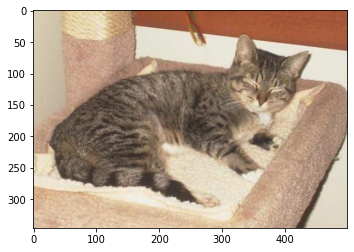

In [106]:
plt.imshow(image)
plt.show()